In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_plate = cv2.imread('DATA/car_plate_4.jpg')

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

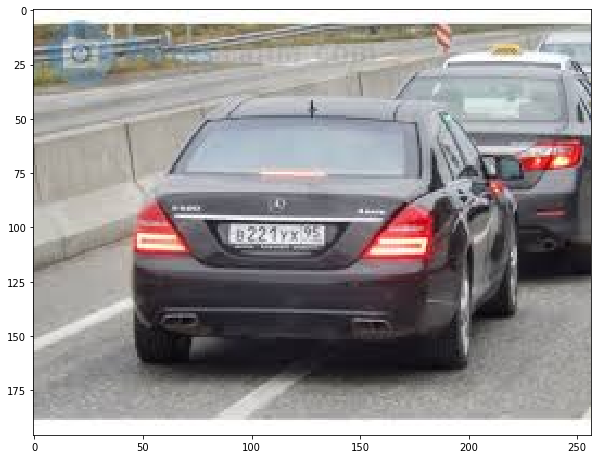

In [4]:
display(car_plate)

In [5]:
plate_cascade = cv2.CascadeClassifier('DATA/haarcascade_russian_plate_number.xml')

In [6]:
def detect_plat(img):
    plate_img = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    
    for (x,y,w,h) in plate_rect:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),4)
        
    return plate_img

In [7]:
result = detect_plat(car_plate) 

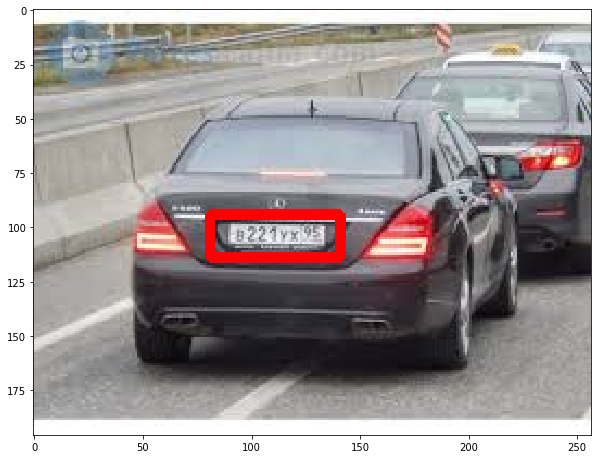

In [8]:
display(result)

In [9]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rect = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    
    for (x,y,w,h) in plate_rect:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img

In [10]:
result_blur = detect_and_blur_plate(car_plate)

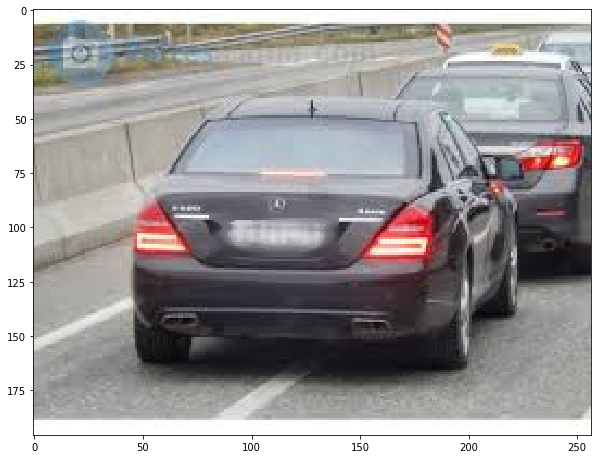

In [11]:
display(result_blur)